In [1]:
#Import packages

import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm


from scipy import stats
from scipy.stats import norm
from sklearn.dummy import DummyRegressor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from statsmodels.formula.api import ols
from sklearn.metrics import mean_squared_error as MSE, r2_score
from sklearn.model_selection import train_test_split, cross_validate, ShuffleSplit, KFold, cross_val_score


In [2]:
#Import dataset
data_relevant = pd.read_csv('data_relevant.csv')
data_relevant

,Unnamed: 0,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_garage,sqft_patio,yr_built,postal_code,grade_code,condition_code,price_sqft
0,21,750000.0,3,2.0,1590,7754,1.0,440,0,1990,98038,7,4,471.698113
1,25,580000.0,3,3.0,2020,4482,1.0,600,120,1992,98031,7,3,287.128713
2,26,2000000.0,3,3.0,2700,7694,1.0,530,640,2006,98053,9,3,740.740741
3,34,785000.0,3,2.0,1350,7354,1.0,460,120,1985,98133,7,5,581.481481
4,39,1680000.0,3,2.5,5200,206039,1.0,1080,670,2007,98092,10,3,323.076923
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2732,30119,500000.0,3,2.5,1610,7250,1.0,490,270,1978,98168,7,3,310.559006
2733,30128,560000.0,3,2.0,1480,8770,1.0,540,180,1985,98023,7,4,378.378378
2734,30138,1011000.0,3,2.0,1460,10995,1.0,460,180,1981,98052,8,3,692.465753
2735,30142,880000.0,4,2.5,2260,5661,1.0,460,230,2000,98108,8,3,389.380531


In [3]:
data_relevant = data_relevant.drop(columns=['Unnamed: 0'])

data_relevant.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_garage,sqft_patio,yr_built,postal_code,grade_code,condition_code,price_sqft
0,750000.0,3,2.0,1590,7754,1.0,440,0,1990,98038,7,4,471.698113
1,580000.0,3,3.0,2020,4482,1.0,600,120,1992,98031,7,3,287.128713
2,2000000.0,3,3.0,2700,7694,1.0,530,640,2006,98053,9,3,740.740741
3,785000.0,3,2.0,1350,7354,1.0,460,120,1985,98133,7,5,581.481481
4,1680000.0,3,2.5,5200,206039,1.0,1080,670,2007,98092,10,3,323.076923


In [4]:
data_relevant.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_garage,sqft_patio,yr_built,postal_code,grade_code,condition_code,price_sqft
count,2.737000e+03,2737.000000,2737.000000,2737.000000,2737.000000,2737.0,2737.000000,2737.000000,2737.000000,2737.000000,2737.000000,2737.00000,2737.000000
mean,8.422258e+05,3.308732,2.350566,1916.839971,22781.881257,1.0,467.278772,243.430764,1987.678115,98054.739130,7.495798,3.54768,450.250338
std,3.868158e+05,0.775191,0.590768,637.386373,51908.754826,0.0,207.783510,245.708990,9.910997,48.849616,0.783651,0.67159,168.203530
min,4.118100e+04,2.000000,1.000000,770.000000,1078.000000,1.0,0.000000,0.000000,1978.000000,98001.000000,6.000000,2.00000,22.943038
25%,5.700000e+05,3.000000,2.000000,1460.000000,7280.000000,1.0,420.000000,70.000000,1980.000000,98023.000000,7.000000,3.00000,335.714286
50%,7.300000e+05,3.000000,2.500000,1810.000000,9014.000000,1.0,480.000000,180.000000,1985.000000,98042.000000,7.000000,3.00000,418.139535
75%,1.010100e+06,4.000000,3.000000,2240.000000,13479.000000,1.0,550.000000,350.000000,1992.000000,98072.000000,8.000000,4.00000,542.168675
max,2.301000e+06,8.000000,7.000000,5490.000000,765753.000000,1.0,2210.000000,2200.000000,2022.000000,98354.000000,12.000000,5.00000,1707.317073


In [5]:
Seattle_postalcodes = [98133, 98125, 98115, 98117, 98107, 98103, 98105, 98199, 98119, 98109, 98102, 98112, 98185, 98145,
98195, 98191, 98181, 98154, 98164, 98121, 98101, 98104, 98122, 98134, 98144, 98124, 98116, 98136,
98126, 98106, 98108, 98118]

data_relevant['in_Seattle'] = np.where(data_relevant['postal_code'].isin(Seattle_postalcodes),1,0)

In [6]:
data_relevant['in_Seattle'].value_counts()

0    2520
1     217
Name: in_Seattle, dtype: int64

In [7]:
Seattle_Homes = data_relevant.loc[data_relevant['in_Seattle'] == 1]
Seattle_Homes['price'].describe()

count    2.170000e+02
mean     8.945603e+05
std      3.139701e+05
min      1.220500e+05
25%      7.000000e+05
50%      8.380000e+05
75%      1.010000e+06
max      2.020000e+06
Name: price, dtype: float64

In [8]:
NotSeattle_Homes = data_relevant.loc[data_relevant['in_Seattle'] == 0]
NotSeattle_Homes['price'].describe()

count    2.520000e+03
mean     8.377193e+05
std      3.921823e+05
min      4.118100e+04
25%      5.600000e+05
50%      7.150000e+05
75%      1.010325e+06
max      2.301000e+06
Name: price, dtype: float64

In [9]:
data_relevant

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_garage,sqft_patio,yr_built,postal_code,grade_code,condition_code,price_sqft,in_Seattle
0,750000.0,3,2.0,1590,7754,1.0,440,0,1990,98038,7,4,471.698113,0
1,580000.0,3,3.0,2020,4482,1.0,600,120,1992,98031,7,3,287.128713,0
2,2000000.0,3,3.0,2700,7694,1.0,530,640,2006,98053,9,3,740.740741,0
3,785000.0,3,2.0,1350,7354,1.0,460,120,1985,98133,7,5,581.481481,1
4,1680000.0,3,2.5,5200,206039,1.0,1080,670,2007,98092,10,3,323.076923,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2732,500000.0,3,2.5,1610,7250,1.0,490,270,1978,98168,7,3,310.559006,0
2733,560000.0,3,2.0,1480,8770,1.0,540,180,1985,98023,7,4,378.378378,0
2734,1011000.0,3,2.0,1460,10995,1.0,460,180,1981,98052,8,3,692.465753,0
2735,880000.0,4,2.5,2260,5661,1.0,460,230,2000,98108,8,3,389.380531,1


In [10]:
data_relevant['price'].min()

41181.0

In [11]:
data_relevant['price'].max()

2301000.0

In [ ]:
fig, ax = plt.subplots(figsize = (15 , 10))

X = data_relevant['price']
sns.histplot(data_relevant, x=X, hue="in_Seattle", multiple="stack")
plt.legend(loc='upper right', labels=['In Seattle', 'Out of Seattle'])
ax.set_xlabel('Price')
ax.set_ylabel('Number of Homes')
ax.set_title('Price of Housing in King County')
plt.ticklabel_format(style='plain', axis='y');

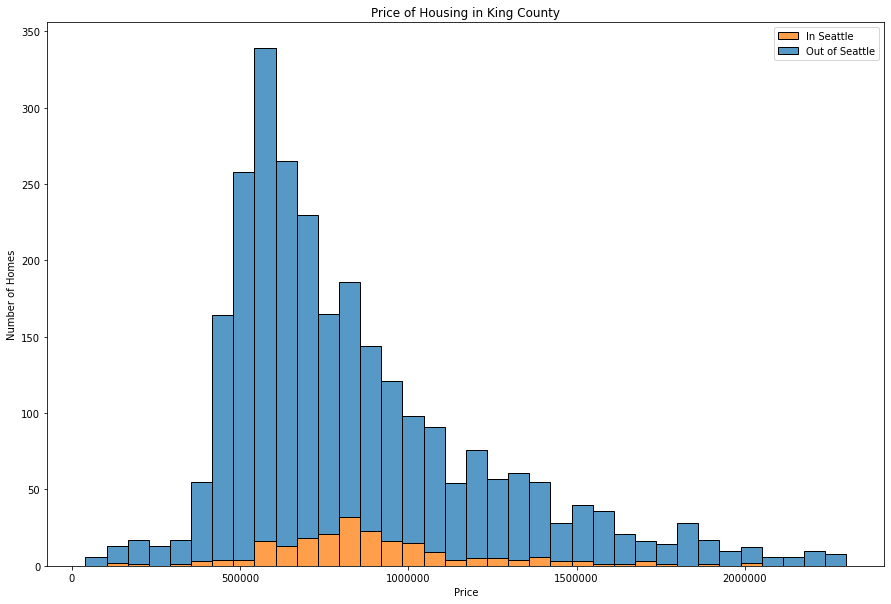

In [13]:
fig, ax = plt.subplots(figsize = (15 , 10))

sns.histplot(data_relevant, x='price', hue="in_Seattle", multiple="stack")
plt.legend(loc='upper right', labels=['In Seattle', 'Out of Seattle'])
ax.set_xlabel('Price')
ax.set_ylabel('Number of Homes')
ax.set_title('Price of Housing in King County')
plt.ticklabel_format(style='plain', axis='x');

In [ ]:
data_relevant['price'] = data_relevant['price'].div(data_relevant['sqft_living'])

fig, ax = plt.subplots(figsize = (12,8))
sns.histplot(ax=ax, data = data_relevant, x = 'price', hue = 'in_Seattle', multiple="stack", binwidth = 20, alpha = .5)
ax.set_xlabel('Price')
ax.set_ylabel('Number of Homes')
ax.set_title('Price of Housing in King County')
ax.legend(['In Seattle','Out Seattle']);

## Train Test Split

In [ ]:
data_relevant.price.ma

In [ ]:
sns.histplot(data_relevant, x="price", hue="in_Seattle", multiple="stack")
plt.legend(loc='upper right', labels=['In Seattle', 'Out of Seattle'])
;

In [ ]:
sns.displot(data_relevant, x="price", hue="in_Seattle", multiple="stack");

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
# set a grey background (use sns.set_theme() if seaborn version 0.11.0 or above) 
sns.set(style="darkgrid")
df = sns.load_dataset("iris")

sns.histplot(data=df, x="sepal_length", color="skyblue", label="Sepal Length", kde=True)
sns.histplot(data=df, x="sepal_width", color="red", label="Sepal Width", kde=True)

plt.legend() 
plt.show()

In [ ]:
data_relevant['price'] = data_relevant['price'].div(data_relevant['sqft_living'])

fig, ax = plt.subplots(figsize = (15,10))
sns.histplot(ax=ax, data = data_relevant, x = 'price', hue = 'in_Seattle', multiple="stack", alpha = .5)
ax.set_xlabel('Price')
ax.set_ylabel('Number of Homes')
ax.set_title('Price of Housing in King County')
ax.legend(['In Seattle','Out Seattle']);